In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.412383,6.427064,6.363543,6.395004,493729600
2010-01-05,6.423470,6.459725,6.389611,6.430062,601904800
2010-01-06,6.321297,6.448940,6.314705,6.423471,552160000
2010-01-07,6.309609,6.352157,6.263766,6.344667,477131200
2010-01-08,6.351558,6.352157,6.264067,6.301220,447610800


In [14]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.412383,6.427064,6.363543,6.395004,493729600
1,2010-01-05,6.423470,6.459725,6.389611,6.430062,601904800
2,2010-01-06,6.321297,6.448940,6.314705,6.423471,552160000
3,2010-01-07,6.309609,6.352157,6.263766,6.344667,477131200
4,2010-01-08,6.351558,6.352157,6.264067,6.301220,447610800


In [15]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [16]:
df.columns = df.columns.droplevel(1)
df.columns = ['Date', 'High', 'Low', 'Open', 'Close', 'Volume']
df.head()

,Date,High,Low,Open,Close,Volume
0,2010-01-04,6.412383,6.427064,6.363543,6.395004,493729600
1,2010-01-05,6.423470,6.459725,6.389611,6.430062,601904800
2,2010-01-06,6.321297,6.448940,6.314705,6.423471,552160000
3,2010-01-07,6.309609,6.352157,6.263766,6.344667,477131200
4,2010-01-08,6.351558,6.352157,6.264067,6.301220,447610800


In [17]:
df = df.drop(['Date'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,6.412383,6.427064,6.363543,6.395004,493729600
1,6.423470,6.459725,6.389611,6.430062,601904800
2,6.321297,6.448940,6.314705,6.423471,552160000
3,6.309609,6.352157,6.263766,6.344667,477131200
4,6.351558,6.352157,6.264067,6.301220,447610800


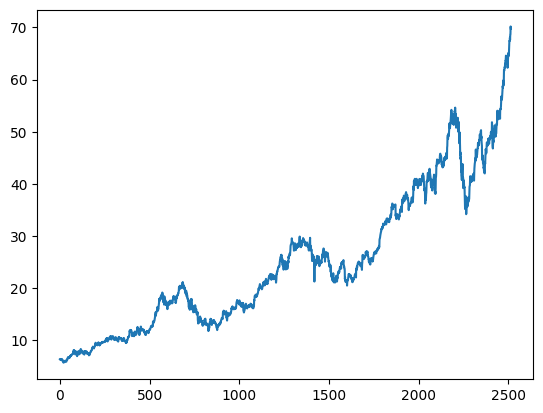

In [18]:
plt.plot(df.Close)

In [19]:
df

,High,Low,Open,Close,Volume
0,6.412383,6.427064,6.363543,6.395004,493729600
1,6.423470,6.459725,6.389611,6.430062,601904800
2,6.321297,6.448940,6.314705,6.423471,552160000
3,6.309609,6.352157,6.263766,6.344667,477131200
4,6.351558,6.352157,6.264067,6.301220,447610800
...,...,...,...,...,...
2510,68.459290,68.519553,67.584263,67.622832,98572000
2511,68.524353,68.673813,68.198936,68.625599,48478800
2512,69.883934,69.900810,68.628045,68.656971,93121200
2513,69.857384,70.862581,69.452415,70.175576,146266000


In [20]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,56.859736
2511,57.053907
2512,57.266444
2513,57.498189


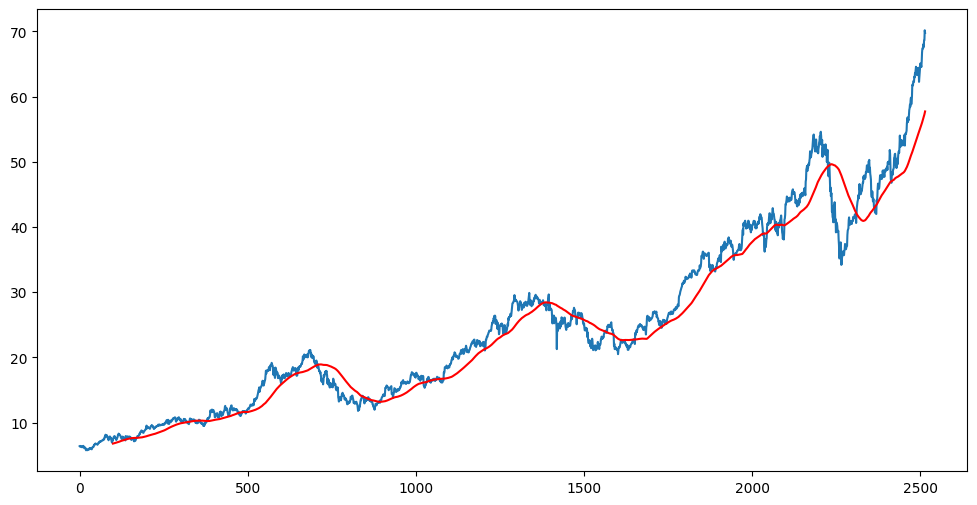

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.show()

In [22]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,51.859648
2511,51.988122
2512,52.114070
2513,52.245644


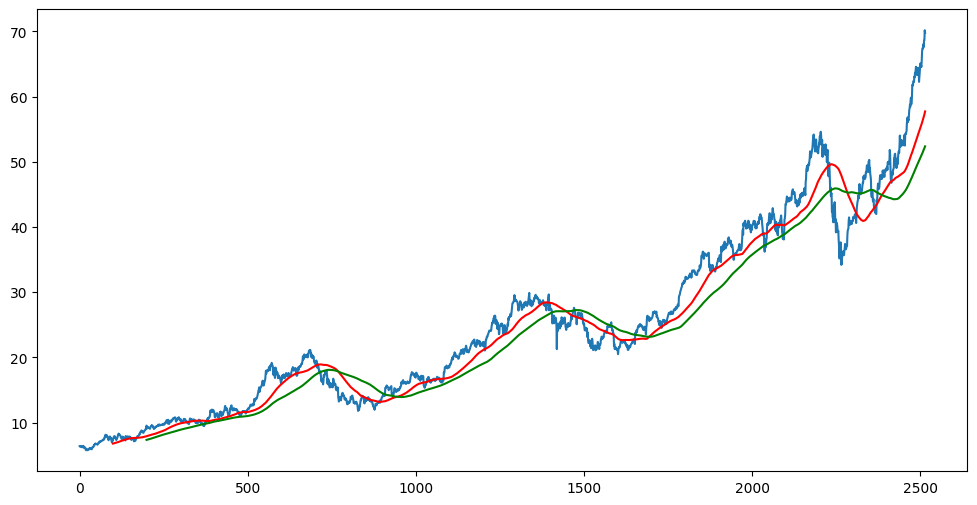

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [25]:
df.shape

(2515, 5)

In [26]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [27]:
data_training.head()

,Close
0,6.395004
1,6.430062
2,6.423471
3,6.344667
4,6.301220


In [28]:
data_testing.head()

,Close
1760,26.814938
1761,26.860991
1762,26.665265
1763,26.676774
1764,26.692889


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0261462 ],
       [0.0275988 ],
       [0.02732572],
       ...,
       [0.86403514],
       [0.87290818],
       [0.8824495 ]])

In [31]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 274ms/step - loss: 0.1371
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 283ms/step - loss: 0.0123
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - loss: 0.0122
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 306ms/step - loss: 0.0113
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 310ms/step - loss: 0.0084
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - loss: 0.0082
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - loss: 0.0079
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - loss: 0.0081
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 275ms/step - loss: 0.0068
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - loss: 0.0075
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 275ms/step - loss: 0.0064
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 277ms/step - loss: 0.0070
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 275ms/step - loss: 0.0067
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - loss: 0.0067
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [37]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [36]:
data_testing.head()

,Close
1760,26.814938
1761,26.860991
1762,26.665265
1763,26.676774
1764,26.692889


In [38]:
data_training.tail(100)

,Close
1660,24.632162
1661,24.794819
1662,24.904789
1663,24.861256
1664,24.691720
...,...
1755,26.895532
1756,26.791907
1757,26.616904
1758,26.831049


In [39]:
past_100_days = data_training.tail(100)

In [41]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

,Close
0,24.632162
1,24.794819
2,24.904789
3,24.861256
4,24.691720


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02391144],
       [0.02739753],
       [0.02975439],
       [0.0288214 ],
       [0.02518789],
       [0.02695556],
       [0.03427129],
       [0.03166916],
       [0.03230741],
       [0.03004889],
       [0.03049081],
       [0.02916501],
       [0.02906683],
       [0.02327309],
       [0.0233713 ],
       [0.0194925 ],
       [0.01546627],
       [0.01477892],
       [0.01713569],
       [0.02479511],
       [0.02577725],
       [0.02543344],
       [0.02258575],
       [0.0097708 ],
       [0.        ],
       [0.02386226],
       [0.02985243],
       [0.0550405 ],
       [0.06122707],
       [0.06157061],
       [0.05106347],
       [0.0549914 ],
       [0.05744634],
       [0.05779018],
       [0.04414042],
       [0.05081794],
       [0.05420567],
       [0.05160342],
       [0.04816647],
       [0.04939403],
       [0.05111243],
       [0.05278183],
       [0.05425484],
       [0.05725001],
       [0.06073595],
       [0.07389471],
       [0.07217612],
       [0.069

In [43]:
input_data.shape

(855, 1)

In [44]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [45]:
x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [46]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step


In [47]:
y_predicted.shape

(755, 1)

In [48]:
y_test

array([0.07069281, 0.07167981, 0.067485  , 0.06773166, 0.06807705,
       0.07232135, 0.0780955 , 0.08214234, 0.08199418, 0.0827839 ,
       0.08382023, 0.08002019, 0.08821251, 0.0852515 , 0.09043338,
       0.08821264, 0.08599184, 0.09028537, 0.09645427, 0.09877381,
       0.09280215, 0.09388796, 0.12290675, 0.12759498, 0.12922373,
       0.13327061, 0.14022912, 0.14422672, 0.14852393, 0.15253891,
       0.15561184, 0.15754486, 0.16770605, 0.16844925, 0.16562408,
       0.17122491, 0.17221656, 0.17692493, 0.16963894, 0.17573555,
       0.17543826, 0.1794529 , 0.18991135, 0.18386414, 0.18678844,
       0.18525224, 0.18470682, 0.18366595, 0.18619359, 0.18421121,
       0.18644172, 0.1869868 , 0.19348015, 0.19486779, 0.19189369,
       0.20036977, 0.18916785, 0.19615628, 0.19734613, 0.18688752,
       0.19442193, 0.20815131, 0.2106792 , 0.20834972, 0.20830013,
       0.20602009, 0.21082806, 0.21117491, 0.20839906, 0.20775495,
       0.20448344, 0.19784174, 0.19937844, 0.19724693, 0.19690

In [49]:
y_predicted

array([[0.13443851],
       [0.13538983],
       [0.13633358],
       [0.13725045],
       [0.13812055],
       [0.1389264 ],
       [0.13966203],
       [0.14034072],
       [0.14098813],
       [0.14162761],
       [0.14227489],
       [0.14293973],
       [0.14361824],
       [0.14431322],
       [0.14502579],
       [0.1457589 ],
       [0.14651166],
       [0.14727223],
       [0.14803346],
       [0.14880326],
       [0.1495956 ],
       [0.15040725],
       [0.15122652],
       [0.1521017 ],
       [0.15310344],
       [0.1542817 ],
       [0.1556665 ],
       [0.15727775],
       [0.15910755],
       [0.16112587],
       [0.16333395],
       [0.16572034],
       [0.16826302],
       [0.17094782],
       [0.17375737],
       [0.17665799],
       [0.17961217],
       [0.18258618],
       [0.18555553],
       [0.18848087],
       [0.19132963],
       [0.19407439],
       [0.1967019 ],
       [0.19922902],
       [0.20166142],
       [0.2040031 ],
       [0.20625   ],
       [0.208

In [51]:
scaler.scale_

array([0.02143205])

In [52]:
scale_factor = 1/0.02143205
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

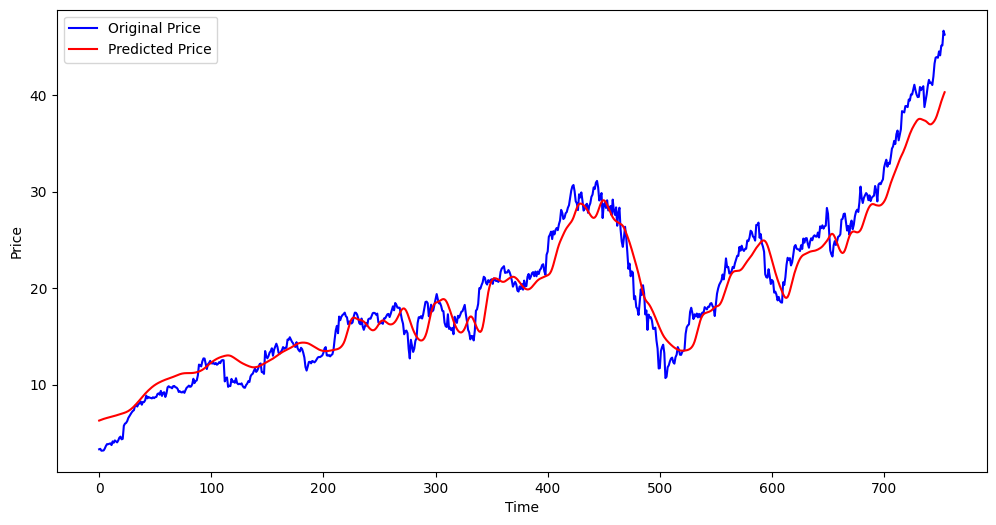

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()